In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
import numpy as np
import my_functions as my
import my_plot_params

In [3]:
dat_saz = xr.open_dataset('../data/dat_saz_6H.nc')
dat_pfz = xr.open_dataset('../data/dat_pfz_6H.nc')
dat_miz = xr.open_dataset('../data/dat_miz_6H.nc')

In [10]:
lightblue = '#5499c7'
blue      = '#21618c'

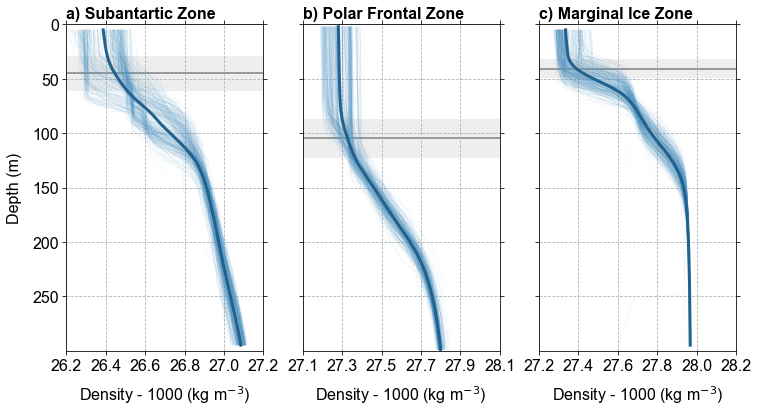

In [16]:
from collections import OrderedDict

fig,ax=plt.subplots(1,3, figsize=[12,6], sharey=True)

for i, dat in enumerate([dat_saz, dat_pfz, dat_miz]):

    [ax[i].plot(dat.density.isel(time=t)-1000, dat.depth, c=lightblue, lw=0.2, alpha=0.25, label='Glider density') for t in range(len(dat.time))]
    
    ax[i].set_ylim(300, 0)
    ax[i].set_xlabel('Density - 1000 (kg m$^{-3}$)', labelpad=10)
    ax[i].yaxis.set_ticks_position('both')
    ax[i].xaxis.set_ticks_position('both')
    
    ax[i].plot(dat.density.mean(dim='time')-1000, dat.depth, c=blue, lw=3, label='Glider mean density', zorder=10)

    mld_mean = dat.mld_03.mean(dim='time')
    mld_std  = dat.mld_03.std(dim='time')
    
    ax[i].grid(ls='--', which='major', axis='both') 
    
    ax[i].plot([26, 28.6], [mld_mean, mld_mean], c='0.6', lw=2, ls='-', label='MLD', zorder=1)
    ax[i].fill_between(x=[26, 28.6], y1=mld_mean-mld_std, y2=mld_mean+mld_std, facecolor='0.75', alpha=0.25, label='MLD $\sigma$', zorder=0)

ax[0].set_xlim(26.2, 27.2)
ax[1].set_xlim(27.1, 28.1)
ax[2].set_xlim(27.2, 28.2)

ax[0].xaxis.set_ticks(np.arange(26.2, 27.4, 0.2))
ax[1].xaxis.set_ticks(np.arange(27.1, 28.3, 0.2))
ax[2].xaxis.set_ticks(np.arange(27.2, 28.4, 0.2))

ax[0].yaxis.set_ticks([250, 200, 150, 100, 50, 0])

ax[0].set_ylabel('Depth (m)', labelpad=10)

# ax[0].set_title('Subantarctic Zone')
# ax[1].set_title('Polar Frontal Zone')
# ax[2].set_title('Marginal Ice Zone')

ax[0].set_title('a) Subantartic Zone',   loc='left', fontweight='bold', fontsize=16)
ax[1].set_title('b) Polar Frontal Zone', loc='left', fontweight='bold', fontsize=16)
ax[2].set_title('c) Marginal Ice Zone',  loc='left', fontweight='bold', fontsize=16)

# ax[1].text(27.45, 93, 'Mixed layer depth', c='0.5', fontsize=14, fontweight='bold')

plt.savefig('/Volumes/GoogleDrive/My Drive/Projects/duplessis-2021-SO-thermohaline/figs_submission2/fig_S3_den_profiles.png', dpi=300, bbox_inches='tight')